Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import os
csv_path = os.path.join('..', '2_IntroDataAnalysis')

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open(os.path.join(csv_path, 'enrollments.csv'), 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [3]:
def read_csv(filepath):
    with open(filepath, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        rows = list(reader)
    return rows

In [4]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = read_csv(os.path.join(csv_path, 'daily_engagement.csv'))
project_submissions = read_csv(os.path.join(csv_path, 'project_submissions.csv'))

print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def count_students_with_set(csv_list, account_key):
    accounts_set = set()
    for row in csv_list:
        accounts_set.add(row[account_key])
    return len(csv_list), len(accounts_set)

enrollment_num_rows, enrollment_num_unique_students = count_students_with_set(enrollments, 'account_key') 
engagement_num_rows, engagement_num_unique_students = count_students_with_set(daily_engagement, 'acct')
submission_num_rows, submission_num_unique_students = count_students_with_set(project_submissions, 'account_key')

print(enrollment_num_rows, enrollment_num_unique_students)
print(engagement_num_rows, engagement_num_unique_students)
print(submission_num_rows, submission_num_unique_students)

(1640, 1302)
(136240, 1237)
(3642, 743)


## Problems in the Data

In [9]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for row in daily_engagement:
    row[u'account_key'] = row.pop('acct', None)


In [10]:
print daily_engagement[0]['account_key']

0


Let's simplify the function!

In [11]:
def get_unique_students(csv_list):
    accounts_set = set()
    for row in csv_list:
        accounts_set.add(row['account_key'])
    return accounts_set

In [12]:
unique_enrolled_students = get_unique_students(enrollments)
print(len(unique_enrolled_students))
unique_engagement_students = get_unique_students(daily_engagement)
print(len(unique_engagement_students))
unique_project_submitters = get_unique_students(project_submissions)
print(len(unique_project_submitters))

1302
1237
743


## Missing Engagement Records

In [13]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for student in enrollments:
    if student['account_key'] not in unique_engagement_students:
        print student
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [14]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
nb_surprising_points = 0
for student in enrollments:
    if student['account_key'] not in unique_engagement_students:
        if student['days_to_cancel'] > 0 or student['days_to_cancel'] is None:
            print student
            nb_surprising_points += 1
print nb_surprising_points
        

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [15]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [16]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [17]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [18]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = dict()
for student in non_udacity_enrollments:
    if student['days_to_cancel'] > 7 or not student['is_canceled']:
        account_key = student['account_key']
        join_date = student['join_date']
        if account_key not in paid_students or join_date > paid_students[account_key]:
            paid_students[account_key] = join_date
print len(paid_students.keys())
        

995


In [19]:
def remove_free_trials(data):
    new_data = list()
    for row in data:
        if row['account_key'] in paid_students:
            new_data.append(row)
    return new_data

paid_enrollments = remove_free_trials(non_udacity_enrollments)
paid_engagement = remove_free_trials(non_udacity_engagement)
paid_submissions = remove_free_trials(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [20]:

for record in paid_engagement:
    if record['num_courses_visited'] > 0:
        record['has_visited'] = 1
    else:
        record['has_visited'] = 0

## Getting Data from First Week

In [21]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [22]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = list()
for engagement in paid_engagement:
    account_key = engagement['account_key']
    engagement_date = engagement['utc_date']
    if within_one_week(paid_students[account_key], engagement_date):
        paid_engagement_in_first_week.append(engagement)

len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [23]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

len(engagement_by_account.keys())

995

In [24]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
    if total_minutes > 7*24*60:
        print len(engagement_by_account[account_key])
        for engagement_record in engagement_for_student:
            print engagement_record['utc_date'] - paid_students[account_key]
 
                
       

In [25]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [26]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## account_key 108 joined and cancelled a lot of time, needed to fix within_one_week function

## Lessons Completed in First Week

In [27]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_record in data:
        value = data_record[key_name]
        grouped_data[value].append(data_record)
    return grouped_data

        
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, grouped_values in grouped_data.items():
        total = 0
        for record in grouped_values:
            total += record[field_name]
        summed_data[key] = total
    return summed_data

def extract_data(total_object):
    if type(total_object) == dict:
        values = total_object.values()
    else:
        values = total_object
    return (np.mean(values),np.std(values),np.min(values),np.max(values))


def describe_data(total_object):
    stats = extract_data(total_object)
    print 'Mean:', stats[0]
    print 'Standard deviation:', stats[1]
    print 'Minimum:', stats[2]
    print 'Maximum:', stats[3]
    

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')
describe_data(total_minutes_by_account)

total_number_lessons_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(total_number_lessons_by_account)




Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [28]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.


total_num_days_of_visit = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(total_num_days_of_visit)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [29]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

subway_passed = set()
for submission_record in paid_submissions:
    account = submission_record['account_key']
    grade = submission_record['assigned_rating']
    project = submission_record['lesson_key']
    if project in subway_project_lesson_keys:
        if grade in ('PASSED', 'DISTINCTION'):
            subway_passed.add(account)

passing_engagement = list()
non_passing_engagement = list()

for account, records in engagement_by_account.items():
    if account in subway_passed:
        passing_engagement.extend(records)
    else:
        non_passing_engagement.extend(records)

print(len(passing_engagement), len(non_passing_engagement))
    
    

(4527, 2392)


## Comparing the Two Student Groups

In [30]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

for metrics_by_account in (total_minutes_by_account, total_number_lessons_by_account, total_num_days_of_visit):
    metrics_by_passing_account = dict()
    metrics_by_non_passing_account = dict()
    
    for account, total_metrics in metrics_by_account.items():
        if account in subway_passed:
            metrics_by_passing_account[account] = total_metrics
        else:
            metrics_by_non_passing_account[account] = total_metrics

    (passing_mean, passing_stdev, passin_min, passing_max) = describe_data(metrics_by_passing_account)
    (non_passing_mean, non_passing_stdev, non_passin_min, non_passing_max) = describe_data(metrics_by_non_passing_account)

    print (passing_mean - non_passing_mean)
    print '%.0f%%' % ((passing_mean - non_passing_mean) / non_passing_mean * 100)


Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


TypeError: 'NoneType' object is not iterable

In [31]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
total_minutes_by_passing_account = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
total_number_lessons_by_passing_account = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
total_num_days_of_visit_by_passing_account = sum_grouped_items(passing_engagement_by_account, 'has_visited')

non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')
total_minutes_by_non_passing_account = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
total_number_lessons_by_non_passing_account = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
total_num_days_of_visit_by_non_passing_account = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')

In [32]:
print 'Statistics:           mean, stdev, min, max'
print 'Minutes spent:'
print 'passing students    : %.1f, %.1f, %.1f, %1f' % extract_data(total_minutes_by_passing_account)
print 'non passing students: %.1f, %.1f, %.1f, %1f' % extract_data(total_minutes_by_non_passing_account)
print 'Number of lessons:'
print 'passing students    : %.1f, %.1f, %.1f, %1f' % extract_data(total_number_lessons_by_passing_account)
print 'non passing students: %.1f, %.1f, %.1f, %1f' % extract_data(total_number_lessons_by_non_passing_account)
print 'Number of days:'
print 'passing students    : %.1f, %.1f, %.1f, %1f' % extract_data(total_num_days_of_visit_by_passing_account)
print 'non passing students: %.1f, %.1f, %.1f, %1f' % extract_data(total_num_days_of_visit_by_non_passing_account)

Statistics:           mean, stdev, min, max
Minutes spent:
passing students    : 394.6, 448.5, 0.0, 3564.733264
non passing students: 143.3, 269.5, 0.0, 1768.522749
Number of lessons:
passing students    : 2.1, 3.1, 0.0, 36.000000
non passing students: 0.9, 2.5, 0.0, 27.000000
Number of days:
passing students    : 3.4, 2.3, 0.0, 7.000000
non passing students: 1.9, 1.9, 0.0, 7.000000


## Making Histograms

Statistics:           mean, stdev, min, max
Minutes spent:
passing students    : 394.6, 448.5, 0.0, 3564.733264
non passing students: 143.3, 269.5, 0.0, 1768.522749


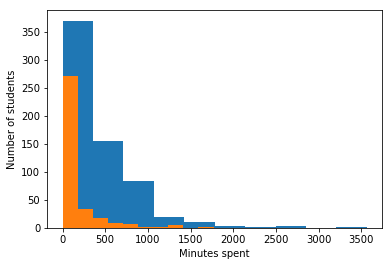

In [33]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
%matplotlib inline
import matplotlib.pyplot as plt
print 'Statistics:           mean, stdev, min, max'
print 'Minutes spent:'
print 'passing students    : %.1f, %.1f, %.1f, %1f' % extract_data(total_minutes_by_passing_account)
print 'non passing students: %.1f, %.1f, %.1f, %1f' % extract_data(total_minutes_by_non_passing_account)
plt.hist(total_minutes_by_passing_account.values())
plt.hist(total_minutes_by_non_passing_account.values())
plt.xlabel('Minutes spent')
plt.ylabel('Number of students')

Number of lessons:
passing students    : 2.1, 3.1, 0.0, 36.000000
non passing students: 0.9, 2.5, 0.0, 27.000000


(array([ 302.,   15.,   12.,    5.,    2.,    4.,    3.,    1.,    1.,
           0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    1.]),
 array([  0.  ,   1.35,   2.7 ,   4.05,   5.4 ,   6.75,   8.1 ,   9.45,
         10.8 ,  12.15,  13.5 ,  14.85,  16.2 ,  17.55,  18.9 ,  20.25,
         21.6 ,  22.95,  24.3 ,  25.65,  27.  ]),
 <a list of 20 Patch objects>)

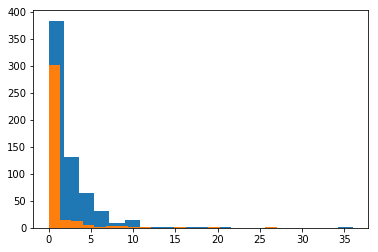

In [104]:
print 'Number of lessons:'
print 'passing students    : %.1f, %.1f, %.1f, %1f' % extract_data(total_number_lessons_by_passing_account)
print 'non passing students: %.1f, %.1f, %.1f, %1f' % extract_data(total_number_lessons_by_non_passing_account)
plt.hist(total_number_lessons_by_passing_account.values(), bins=20)
plt.hist(total_number_lessons_by_non_passing_account.values(), bins=20)

Number of days:
passing students    : 3.4, 2.3, 0.0, 7.000000
non passing students: 1.9, 1.9, 0.0, 7.000000


(array([ 97.,  90.,  56.,  41.,  15.,  24.,  25.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 7 Patch objects>)

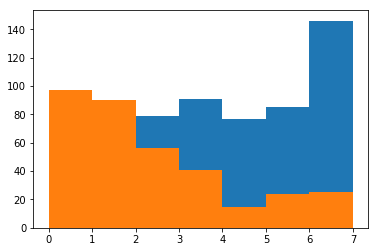

In [105]:
print 'Number of days:'
print 'passing students    : %.1f, %.1f, %.1f, %1f' % extract_data(total_num_days_of_visit_by_passing_account)
print 'non passing students: %.1f, %.1f, %.1f, %1f' % extract_data(total_num_days_of_visit_by_non_passing_account)
plt.hist(total_num_days_of_visit_by_passing_account.values(), bins=7)
plt.hist(total_num_days_of_visit_by_non_passing_account.values(), bins=7)

## Improving Plots and Sharing Findings

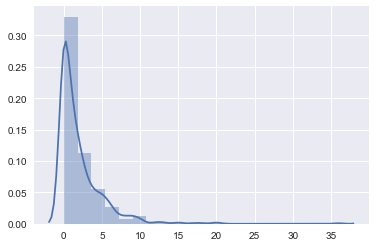

In [106]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

x = total_number_lessons_by_passing_account.values()

sns.set()
#plt.hist(x, bins=20)
sns.distplot(x, bins=20)

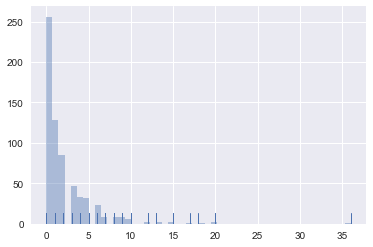

In [107]:
sns.distplot(x, kde=False, rug=True, bins=50);

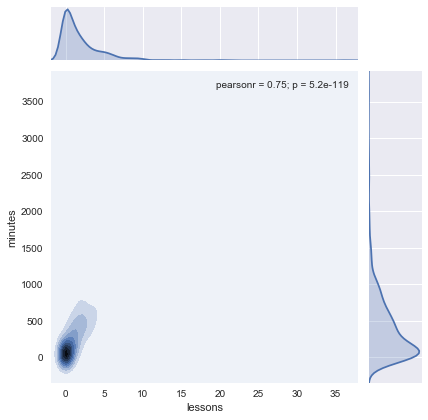

In [108]:
import pandas as pd
x = total_number_lessons_by_passing_account.values()
y = total_minutes_by_passing_account.values()
data = np.column_stack((x,y))
df = pd.DataFrame(data, columns=["lessons", "minutes"])
sns.jointplot(x="lessons", y="minutes", data=df, kind='kde');

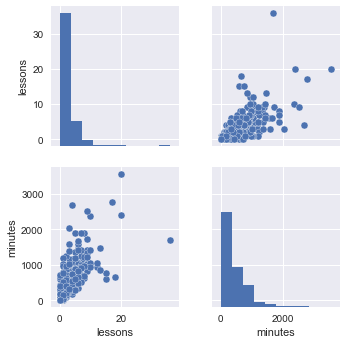

In [109]:
sns.pairplot(df)

# using Pandas

### pandas much quicker that open + unicode.ReaderDict !!!

In [110]:
daily_engagement_full = read_csv(os.path.join(csv_path, 'daily_engagement_full.csv'))

In [111]:
daily_engagement_full = pd.read_csv(os.path.join(csv_path, 'daily_engagement_full.csv'))

### pandas handles struct arrays !!!

In [112]:
daily_engagement_full

,utc_date,acct,registration_date,subscription_start,course_key,sibling_key,course_title,has_visited,total_minutes_visited,lessons_completed,projects_completed,account_key
0,2014-11-05,448,2014-08-05,2014-11-05,ud359-nd,ud359,Intro to Data Science,0.0,0.000000,0.0,0.0,2257038596
1,2014-11-05,448,2014-08-05,2014-11-05,ud120-nd,ud120,Intro to Machine Learning,0.0,0.000000,0.0,0.0,2257038596
2,2014-11-05,448,2014-08-05,2014-11-05,ud651-nd,ud651,Data Analysis with R,0.0,0.000000,0.0,0.0,2257038596
3,2014-11-05,448,2014-08-05,2014-11-05,ud507-nd,ud507,Data Visualization and D3.js,0.0,0.000000,0.0,0.0,2257038596
4,2014-11-05,448,2014-08-05,2014-11-05,ud651,ud651,Data Analysis with R,0.0,0.000000,0.0,0.0,2257038596
5,2014-11-05,448,2014-08-05,2014-11-05,ud804-nd,ud804,JavaScript Basics,0.0,0.000000,0.0,0.0,2257038596
6,2014-11-05,448,2014-08-05,2014-11-05,ud032-nd,ud032,Data Wrangling with MongoDB,0.0,0.000000,0.0,0.0,2257038596
7,2014-11-05,448,2014-08-05,2014-11-05,ud304-nd,ud304,Intro to HTML and CSS,0.0,0.000000,0.0,0.0,2257038596
8,2014-11-05,448,2014-08-05,2014-11-05,ud120,ud120,Intro to Machine Learning,0.0,0.000000,0.0,0.0,2257038596
9,2014-11-05,448,2014-08-05,2014-11-05,ud359,ud359,Intro to Data Science,0.0,0.000000,0.0,0.0,2257038596


### pandas unique function()

In [113]:
unique_engagement_students = daily_engagement_full['acct'].unique()
len(unique_engagement_students)

1237

In [114]:
unique_engagement_students.argmax()

948

In [115]:
np.where(unique_engagement_students==unique_engagement_students.max())

(array([948], dtype=int64),)

In [127]:
np.arange(10).std()

2.8722813232690143

In [128]:
a=pd.Series([1, 2, 3, 4])
b=pd.Series([4, 5, 6, 7])

In [129]:
aminus = a < a.mean()
bminus = b < b.mean()
aplus = a > a.mean()
bplus = b > b.mean()


In [130]:
print (aminus & bminus) | (aplus & bplus)

0    True
1    True
2    True
3    True
dtype: bool


In [131]:
True ^ aminus

0    False
1    False
2     True
3     True
dtype: bool

In [132]:
b=pd.Series([13, 12, 11, 10])

In [133]:
aminus = a < a.mean()
bminus = b < b.mean()
aplus = a > a.mean()
bplus = b > b.mean()

In [134]:
indices = (aminus & bminus) | (aplus & bplus)

In [135]:
print indices[indices].size
print indices.sum()

0
0


In [138]:
a

0    1
1    2
2    3
3    4
dtype: int64

In [136]:
a.iloc[a.argmax()]

4

In [139]:
a.loc[a.argmax()]

4

In [137]:
b=pd.Series([13, 12, 11, 10], index=('a','b','c','d'))

In [140]:
b.argmax()

'a'

In [141]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
s=s1+s2
print s

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64


In [142]:
szeros = 0.*(s1+s2).fillna(0.)
s1b = (s1+szeros).fillna(0.)
s2b = (s2+szeros).fillna(0.)
print s1b + s2b

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64


In [143]:
s1.add(s2, fill_value=0.)

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64

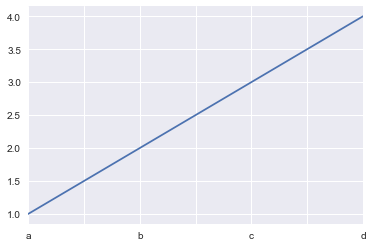

In [144]:
s1.plot()

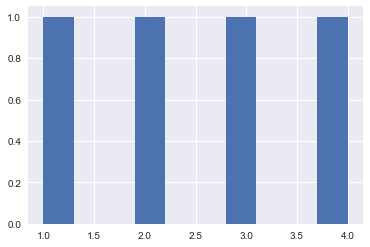

In [145]:
s1.hist()

In [146]:
df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})

In [147]:
df

,A,B
0,0,3
1,1,4
2,2,5


In [148]:
df.max().argmax()

'B'

In [149]:
subway_df = pd.read_csv(os.path.join(csv_path, 'nyc_subway_weather.csv'))

In [150]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [151]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [152]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    
    x_zscores = (x - x.mean())/x.std(ddof=0)
    y_zscores = (y - y.mean())/y.std(ddof=0)
    
    person_r = (x_zscores*y_zscores).mean()
    return person_r

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print correlation(entries, rain)
print correlation(entries, temp)
print correlation(rain, temp)

print correlation(entries, cum_entries)

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


In [153]:
df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]}, index=('r1','r2','r3'))
df

,A,B
r1,0,3
r2,1,4
r3,2,5


In [154]:
df.shift(-1).fillna(0)

,A,B
r1,1.0,4.0
r2,2.0,5.0
r3,0.0,0.0


In [155]:
df.shift().fillna(0.)

,A,B
r1,0.0,0.0
r2,0.0,3.0
r3,1.0,4.0


In [156]:
df - df.shift().fillna(0.)

,A,B
r1,0.0,3.0
r2,1.0,1.0
r3,1.0,1.0


In [157]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
    
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    def convert(grade):
        if   90 <= grade: newgrade='A'
        elif 80 <= grade: newgrade='B'
        elif 70 <= grade: newgrade='C'
        elif 60 <= grade: newgrade='D'
        else: newgrade='F'
        return newgrade

    return grades.applymap(convert)

print convert_grades(grades_df)

        exam1 exam2
Andre       F     F
Barry       B     D
Chris       C     F
Dan         C     F
Emilio      B     D
Fred        C     F
Greta       A     C
Humbert     D     F
Ivan        A     C
James       B     D


In [158]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print convert_grades_curve(grades_df['exam1'])
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print grades_df.apply(convert_grades_curve)
    
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    def standardize_serie(s):
        return (s - s.mean())/s.std(ddof=0)
    
    return df.apply(standardize_serie)

print standardize(grades_df)

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B
            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400


In [160]:
ds = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])

In [163]:
ds.argmax()

'd'

In [170]:
ds.loc[ds.argmax()] == ds.max()

True

In [175]:
ds2 = ds + 0
ds2.loc[ds.argmax()] = ds.min()
print ds2

a    1
b    2
c    3
d    1
dtype: int64


In [183]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if False:   
    print df.apply(np.mean)
    print df.apply(np.max)
    
def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    def get_second_largest(ds):
        #ds_tmp = ds + 0
        ds_tmp = ds.sort_values(ascending=False)
        #ds_tmp.loc[ds.argmax()] = ds.min()
        #ds_tmp.argmax()
        #return ds.loc[ds_tmp.argmax()]
        return ds_tmp.iloc[1]
    
    return df.apply(get_second_largest)

print df
print second_largest(df)
print type(second_largest(df))


   a   b   c
0  4  20  25
1  5  10  20
2  3  40   5
3  1  50  15
4  2  30  10
a     4
b    40
c    20
dtype: int64
<class 'pandas.core.series.Series'>


In [184]:
df

,a,b,c
0,4,20,25
1,5,10,20
2,3,40,5
3,1,50,15
4,2,30,10


In [186]:
df['a'][1]

5

In [187]:
import pandas as pd

# Change False to True for each block of code to see what it does

# Adding a Series to a square DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    
# Adding a Series to a one-row DataFrame 
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s

# Adding a Series to a one-column DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    

    
# Adding when DataFrame column names match Series index
if True:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164
    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44
    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN
    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164
    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


## important: addition of dataFrames and Series with given axis direction

In [190]:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    print df.add(s, axis='columns')
    print df.add(s, axis='index')

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN
    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN
    0
0  11
1  22
2  33
3  44


### Note: In order to get the proper computations, we should actually be setting the value of the "ddof" parameter to 0 in the .std() function.

### Note that the type of standard deviation calculated by default is different between numpy's .std() and pandas' .std() functions. By default, numpy calculates a population standard deviation, with "ddof = 0". On the other hand, pandas calculates a sample standard deviation, with "ddof = 1". If we know all of the scores, then we have a population - so to standardize using pandas, we need to set "ddof = 0".

In [222]:
import pandas as pd

# Adding using +
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    
# Adding with axis='index'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df.add(s, axis='index')
    # The functions sub(), mul(), and div() work similarly to add()
    
# Adding with axis='columns'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df.add(s, axis='columns')
    # The functions sub(), mul(), and div() work similarly to add()
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize_serie(s):
        return (s - s.mean())/s.std(ddof=0)


def standardize_with_apply(df):
    return df.apply(standardize_serie)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    s_mean = df.mean()
    s_std = df.std(ddof=0)
    df_dev = df.sub(s_mean)
    df_std = df_dev.div(s_std, axis='columns')
    return df_std

print standardize_with_apply(grades_df)
print ''
print standardize(grades_df)
print ''


def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    s_mean = df.mean(axis='columns')
    s_std = df.std(ddof=0, axis='columns')
    df_dev = df.sub(s_mean, axis='index')
    df_std = df_dev.div(s_std, axis='index')
    #grades_df.sub(grades_df.mean(axis='columns'), axis='index').div(grades_df.std(ddof=0, axis='columns'), axis='index')
    return df_std

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400



In [206]:
print standardize(grades_df).equals(standardize_with_apply(grades_df))

False


In [207]:
standardize(grades_df)['exam1']

Andre     -2.315341
Barry      0.220191
Chris      0.020017
Dan       -0.180156
Emilio     0.753987
Fred      -0.513779
Greta      0.887436
Humbert   -0.847401
Ivan       1.354508
James      0.620538
Name: exam1, dtype: float64

In [208]:
standardize_with_apply(grades_df)['exam1']

Andre     -2.315341
Barry      0.220191
Chris      0.020017
Dan       -0.180156
Emilio     0.753987
Fred      -0.513779
Greta      0.887436
Humbert   -0.847401
Ivan       1.354508
James      0.620538
Name: exam1, dtype: float64

In [209]:
standardize(grades_df)['exam1'] == standardize_with_apply(grades_df)['exam1']

Andre      False
Barry      False
Chris      False
Dan        False
Emilio      True
Fred       False
Greta      False
Humbert    False
Ivan        True
James      False
Name: exam1, dtype: bool

In [210]:
standardize(grades_df)['exam1']['Dan']

-0.18015620309337854

In [211]:
standardize_with_apply(grades_df)['exam1']['Dan']

-0.18015620309337851

In [214]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [215]:
grades_df.mean(axis='columns')

Andre      33.5
Barry      72.0
Chris      67.0
Dan        65.5
Emilio     78.0
Fred       60.5
Greta      85.0
Humbert    55.5
Ivan       85.0
James      73.5
dtype: float64

In [224]:
grades_df.sub(grades_df.mean(axis='columns'), axis='index')

,exam1,exam2
Andre,9.5,-9.5
Barry,9.0,-9.0
Chris,11.0,-11.0
Dan,9.5,-9.5
Emilio,11.0,-11.0
Fred,9.5,-9.5
Greta,6.0,-6.0
Humbert,9.5,-9.5
Ivan,13.0,-13.0
James,13.5,-13.5


In [226]:
grades_df.sub(grades_df.mean(axis='columns'), axis='index').div(grades_df.std(ddof=0, axis='columns'), axis='index')

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


In [223]:
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0
